In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
weather = pd.read_csv('weather_data.csv.gz')

In [4]:
df.head()

,date,price,1_hour_pred,2_hour_pred,3_hour_pred,market_demand,ontario_demand,1_lag_pred,2_lag_pred,3_lag_pred
0,2020-01-01 01:00:00,0.0,0.0,0.0,0.00,16565,13219,NaN,NaN,NaN
1,2020-01-01 02:00:00,0.0,0.0,0.0,0.00,16193,12895,0.0,NaN,NaN
2,2020-01-01 03:00:00,0.0,0.0,0.0,0.00,16072,12554,0.0,0.0,NaN
3,2020-01-01 04:00:00,0.0,0.0,0.0,-0.02,15930,12360,0.0,0.0,0.0
4,2020-01-01 05:00:00,0.0,0.0,0.0,-0.10,15963,12353,0.0,0.0,0.0


In [5]:
weather.head()

,time,fsa,avg_cloudCover,avg_daytime,avg_dewPoint,avg_feelslikemax,avg_feelslikemin,avg_humidity,avg_moonPhase,avg_precipIntensity,avg_precipProbability,avg_pressure,avg_tempmax,avg_tempmin,avg_uvIndex,avg_visibility,avg_windBearing,avg_windGust,avg_windSpeed
0,2020-01-01,1,98.527976,8.974714,43.836310,48.296429,31.425000,93.881548,0.330,0.842655,98.809524,1010.488690,49.186905,38.870833,0.238095,3.547024,314.475000,23.861905,14.661905
1,2020-01-02,1,14.463988,8.994456,29.684524,36.263095,19.545536,81.846845,0.760,0.091815,90.476190,1016.298810,37.800893,28.814881,0.898810,144.717857,179.643750,24.729268,18.124107
2,2020-01-03,1,15.275000,9.009132,21.596429,28.911607,12.476190,78.650565,0.780,0.298542,91.071429,1014.995238,32.570238,22.441071,0.767857,145.779762,260.733929,27.255147,16.108036
3,2020-01-04,1,10.915774,9.024989,17.761607,27.502381,9.354762,75.306339,0.300,0.033929,49.107143,1021.100298,29.132440,20.215774,0.976190,147.655060,205.258333,20.224597,12.712798
4,2020-01-05,1,12.485417,9.042004,24.571131,34.160417,17.693452,77.407708,0.335,0.000208,0.595238,1018.830357,34.879464,26.745833,1.267857,147.277381,220.975298,23.833333,12.097917


In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
df['date'] = df['date'].dt.date

In [8]:
price = df.groupby('date').mean().reset_index()[['date','price']]

In [9]:
price.shape

(1113, 2)

In [10]:
demand = df.groupby('date').sum().reset_index()[['date','ontario_demand']]

In [11]:
demand.rename(columns={'ontario_demand':'demand'},inplace=True)

In [12]:
pred = df.groupby('date').mean().reset_index()[['date','1_lag_pred']]

In [13]:
demand.shape

(1113, 2)

In [14]:
base = pd.merge(price,demand)

In [15]:
base = pd.merge(base,pred)

In [16]:
base

,date,price,demand,1_lag_pred
0,2020-01-01,0.575217,324937,2.401364
1,2020-01-02,0.010000,362395,0.310000
2,2020-01-03,16.015000,369431,11.038750
3,2020-01-04,15.604583,361928,16.430833
4,2020-01-05,5.554167,359417,10.533333
...,...,...,...,...
1108,2023-01-13,32.650417,417128,36.066087
1109,2023-01-14,35.350000,409515,42.389583
1110,2023-01-15,32.585000,400356,38.605000
1111,2023-01-16,25.252917,408940,38.588333


In [17]:
weather.rename(columns={'time':'date'},inplace=True)

In [18]:
weather['date']=pd.to_datetime(weather['date'])

In [19]:
weather['date'] = weather['date'].dt.date

In [20]:
base = pd.merge(base,weather)

In [21]:
base

,date,price,demand,1_lag_pred,fsa,avg_cloudCover,avg_daytime,avg_dewPoint,avg_feelslikemax,avg_feelslikemin,...,avg_precipIntensity,avg_precipProbability,avg_pressure,avg_tempmax,avg_tempmin,avg_uvIndex,avg_visibility,avg_windBearing,avg_windGust,avg_windSpeed
0,2020-01-01,0.575217,324937,2.401364,1,98.527976,8.974714,43.836310,48.296429,31.425000,...,0.842655,98.809524,1010.488690,49.186905,38.870833,0.238095,3.547024,314.475000,23.861905,14.661905
1,2020-01-02,0.010000,362395,0.310000,1,14.463988,8.994456,29.684524,36.263095,19.545536,...,0.091815,90.476190,1016.298810,37.800893,28.814881,0.898810,144.717857,179.643750,24.729268,18.124107
2,2020-01-03,16.015000,369431,11.038750,1,15.275000,9.009132,21.596429,28.911607,12.476190,...,0.298542,91.071429,1014.995238,32.570238,22.441071,0.767857,145.779762,260.733929,27.255147,16.108036
3,2020-01-04,15.604583,361928,16.430833,1,10.915774,9.024989,17.761607,27.502381,9.354762,...,0.033929,49.107143,1021.100298,29.132440,20.215774,0.976190,147.655060,205.258333,20.224597,12.712798
4,2020-01-05,5.554167,359417,10.533333,1,12.485417,9.042004,24.571131,34.160417,17.693452,...,0.000208,0.595238,1018.830357,34.879464,26.745833,1.267857,147.277381,220.975298,23.833333,12.097917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2022-12-27,62.203750,394282,105.076667,1,33.805178,8.938425,22.154142,27.094675,11.076331,...,0.030896,69.378698,1016.353698,33.397929,23.131361,0.532544,104.650296,140.861391,27.226923,22.803402
1092,2022-12-28,32.654583,380928,47.634583,1,26.638905,8.946793,27.384024,35.702071,21.303550,...,0.046541,73.520710,1012.764201,38.292456,30.258136,0.968935,111.222041,216.460651,29.878078,22.091420
1093,2022-12-29,9.303750,363046,19.113333,1,25.899408,8.956399,28.134320,35.414941,22.743935,...,0.001586,4.881657,1017.836538,37.882692,31.273817,0.980769,112.567899,170.845266,25.813760,14.995858
1094,2022-12-30,10.794583,353646,14.966250,1,37.785355,8.967255,33.166864,40.125000,29.356213,...,0.113680,46.301775,1014.807988,41.577811,35.724704,0.730769,111.363609,196.254142,23.325000,14.787426


In [22]:
base['avg_temp']=(base['avg_tempmax']-base['avg_tempmin'])/2

In [23]:
base

,date,price,demand,1_lag_pred,fsa,avg_cloudCover,avg_daytime,avg_dewPoint,avg_feelslikemax,avg_feelslikemin,...,avg_precipProbability,avg_pressure,avg_tempmax,avg_tempmin,avg_uvIndex,avg_visibility,avg_windBearing,avg_windGust,avg_windSpeed,avg_temp
0,2020-01-01,0.575217,324937,2.401364,1,98.527976,8.974714,43.836310,48.296429,31.425000,...,98.809524,1010.488690,49.186905,38.870833,0.238095,3.547024,314.475000,23.861905,14.661905,5.158036
1,2020-01-02,0.010000,362395,0.310000,1,14.463988,8.994456,29.684524,36.263095,19.545536,...,90.476190,1016.298810,37.800893,28.814881,0.898810,144.717857,179.643750,24.729268,18.124107,4.493006
2,2020-01-03,16.015000,369431,11.038750,1,15.275000,9.009132,21.596429,28.911607,12.476190,...,91.071429,1014.995238,32.570238,22.441071,0.767857,145.779762,260.733929,27.255147,16.108036,5.064583
3,2020-01-04,15.604583,361928,16.430833,1,10.915774,9.024989,17.761607,27.502381,9.354762,...,49.107143,1021.100298,29.132440,20.215774,0.976190,147.655060,205.258333,20.224597,12.712798,4.458333
4,2020-01-05,5.554167,359417,10.533333,1,12.485417,9.042004,24.571131,34.160417,17.693452,...,0.595238,1018.830357,34.879464,26.745833,1.267857,147.277381,220.975298,23.833333,12.097917,4.066815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2022-12-27,62.203750,394282,105.076667,1,33.805178,8.938425,22.154142,27.094675,11.076331,...,69.378698,1016.353698,33.397929,23.131361,0.532544,104.650296,140.861391,27.226923,22.803402,5.133284
1092,2022-12-28,32.654583,380928,47.634583,1,26.638905,8.946793,27.384024,35.702071,21.303550,...,73.520710,1012.764201,38.292456,30.258136,0.968935,111.222041,216.460651,29.878078,22.091420,4.017160
1093,2022-12-29,9.303750,363046,19.113333,1,25.899408,8.956399,28.134320,35.414941,22.743935,...,4.881657,1017.836538,37.882692,31.273817,0.980769,112.567899,170.845266,25.813760,14.995858,3.304438
1094,2022-12-30,10.794583,353646,14.966250,1,37.785355,8.967255,33.166864,40.125000,29.356213,...,46.301775,1014.807988,41.577811,35.724704,0.730769,111.363609,196.254142,23.325000,14.787426,2.926553


In [24]:
base['price'].min(),base['price'].max(),base['price'].mean()

(-0.6420833333333332, 126.46541666666667, 28.103917473288902)

In [25]:
base['demand'].min(),base['demand'].max(),base['demand'].mean()

(268184, 490924, 368271.4726277372)

In [26]:
base.to_csv('final_daily.csv',index=False)

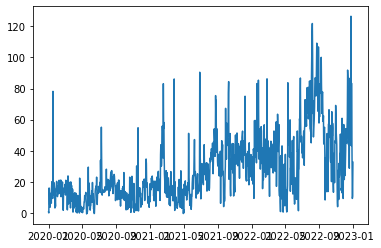

In [26]:
plt.plot(base['date'], base['price'])